In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import category_encoders as ce

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = '/kaggle/input/assignmentdataset/Table 23 (1).csv'
df = pd.read_csv(data, header=None)

In [4]:
df.shape

(100, 23)

In [5]:
df = df.iloc[44:80]

In [6]:
df.head(36)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
44,Акмолинская,м,19,0,0,1,0,3,1,3,...,1,2,0,1,0,1,1,4,0,7
45,NaN,ж,15,0,0,1,1,3,0,1,...,2,4,1,0,1,0,0,5,1,5
46,Актюбинская,м,33,3,0,0,0,6,3,5,...,4,4,0,2,0,0,0,9,0,10
47,NaN,ж,36,2,1,3,9,2,4,2,...,0,1,6,0,1,0,0,16,4,4
48,Алматинская,м,55,2,2,4,6,4,3,7,...,2,4,2,2,1,0,0,13,4,42
49,NaN,ж,70,3,4,5,5,2,9,8,...,8,2,5,0,2,0,0,16,4,49
50,Атырауская,м,31,2,3,3,4,2,3,5,...,1,4,0,0,0,0,0,9,0,15
51,NaN,ж,31,2,1,1,2,6,1,8,...,0,2,2,0,0,0,0,10,0,17
52,Западно-Казахстанская,м,18,0,0,1,0,3,1,0,...,3,4,0,0,0,1,0,4,0,7
53,NaN,ж,21,0,1,0,1,5,3,5,...,1,1,0,0,3,0,0,9,1,8


In [7]:
col_names = ['Area', 'Gender', 'Total', '0-4', '5-9','10-14', '15-19', '20-24', '25-28', '29-34', '35-39', '40-44', '45-49', '50-54', '55-64', '65-69', '70-74', '75-79', '80-84', '85+', '14-28', '15-17','Rural']
df.columns = col_names

In [8]:
df.head(36)

,Area,Gender,Total,0-4,5-9,10-14,15-19,20-24,25-28,29-34,...,50-54,55-64,65-69,70-74,75-79,80-84,85+,14-28,15-17,Rural
44,Акмолинская,м,19,0,0,1,0,3,1,3,...,1,2,0,1,0,1,1,4,0,7
45,NaN,ж,15,0,0,1,1,3,0,1,...,2,4,1,0,1,0,0,5,1,5
46,Актюбинская,м,33,3,0,0,0,6,3,5,...,4,4,0,2,0,0,0,9,0,10
47,NaN,ж,36,2,1,3,9,2,4,2,...,0,1,6,0,1,0,0,16,4,4
48,Алматинская,м,55,2,2,4,6,4,3,7,...,2,4,2,2,1,0,0,13,4,42
49,NaN,ж,70,3,4,5,5,2,9,8,...,8,2,5,0,2,0,0,16,4,49
50,Атырауская,м,31,2,3,3,4,2,3,5,...,1,4,0,0,0,0,0,9,0,15
51,NaN,ж,31,2,1,1,2,6,1,8,...,0,2,2,0,0,0,0,10,0,17
52,Западно-Казахстанская,м,18,0,0,1,0,3,1,0,...,3,4,0,0,0,1,0,4,0,7
53,NaN,ж,21,0,1,0,1,5,3,5,...,1,1,0,0,3,0,0,9,1,8


In [10]:
df['Area'] = df['Area'].fillna(method='ffill')

In [11]:
df.head(36)

,Area,Gender,Total,0-4,5-9,10-14,15-19,20-24,25-28,29-34,...,50-54,55-64,65-69,70-74,75-79,80-84,85+,14-28,15-17,Rural
44,Акмолинская,м,19,0,0,1,0,3,1,3,...,1,2,0,1,0,1,1,4,0,7
45,Акмолинская,ж,15,0,0,1,1,3,0,1,...,2,4,1,0,1,0,0,5,1,5
46,Актюбинская,м,33,3,0,0,0,6,3,5,...,4,4,0,2,0,0,0,9,0,10
47,Актюбинская,ж,36,2,1,3,9,2,4,2,...,0,1,6,0,1,0,0,16,4,4
48,Алматинская,м,55,2,2,4,6,4,3,7,...,2,4,2,2,1,0,0,13,4,42
49,Алматинская,ж,70,3,4,5,5,2,9,8,...,8,2,5,0,2,0,0,16,4,49
50,Атырауская,м,31,2,3,3,4,2,3,5,...,1,4,0,0,0,0,0,9,0,15
51,Атырауская,ж,31,2,1,1,2,6,1,8,...,0,2,2,0,0,0,0,10,0,17
52,Западно-Казахстанская,м,18,0,0,1,0,3,1,0,...,3,4,0,0,0,1,0,4,0,7
53,Западно-Казахстанская,ж,21,0,1,0,1,5,3,5,...,1,1,0,0,3,0,0,9,1,8


In [12]:
df['Rural'] = df['Rural'].fillna(0)

In [13]:
df.head(36)

,Area,Gender,Total,0-4,5-9,10-14,15-19,20-24,25-28,29-34,...,50-54,55-64,65-69,70-74,75-79,80-84,85+,14-28,15-17,Rural
44,Акмолинская,м,19,0,0,1,0,3,1,3,...,1,2,0,1,0,1,1,4,0,7
45,Акмолинская,ж,15,0,0,1,1,3,0,1,...,2,4,1,0,1,0,0,5,1,5
46,Актюбинская,м,33,3,0,0,0,6,3,5,...,4,4,0,2,0,0,0,9,0,10
47,Актюбинская,ж,36,2,1,3,9,2,4,2,...,0,1,6,0,1,0,0,16,4,4
48,Алматинская,м,55,2,2,4,6,4,3,7,...,2,4,2,2,1,0,0,13,4,42
49,Алматинская,ж,70,3,4,5,5,2,9,8,...,8,2,5,0,2,0,0,16,4,49
50,Атырауская,м,31,2,3,3,4,2,3,5,...,1,4,0,0,0,0,0,9,0,15
51,Атырауская,ж,31,2,1,1,2,6,1,8,...,0,2,2,0,0,0,0,10,0,17
52,Западно-Казахстанская,м,18,0,0,1,0,3,1,0,...,3,4,0,0,0,1,0,4,0,7
53,Западно-Казахстанская,ж,21,0,1,0,1,5,3,5,...,1,1,0,0,3,0,0,9,1,8


In [14]:
df.isnull()[4:36].sum()

Area      0
Gender    0
Total     0
0-4       0
5-9       0
10-14     0
15-19     0
20-24     0
25-28     0
29-34     0
35-39     0
40-44     0
45-49     0
50-54     0
55-64     0
65-69     0
70-74     0
75-79     0
80-84     0
85+       0
14-28     0
15-17     0
Rural     0
dtype: int64

In [17]:
age_categories = col_names[3:20]
X = df[['Area']]
y = df[age_categories]

In [21]:
encoder = ce.OrdinalEncoder(cols=['Area'])
X_encoded = encoder.fit_transform(X)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.33, random_state=42)

In [24]:
dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)

In [25]:
clf_multioutput = MultiOutputClassifier(dt_classifier)

In [27]:
clf_multioutput.fit(X_train, y_train)

MultiOutputClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                       random_state=0))

In [34]:
y_pred_multioutput = clf_multioutput.predict(X_test)

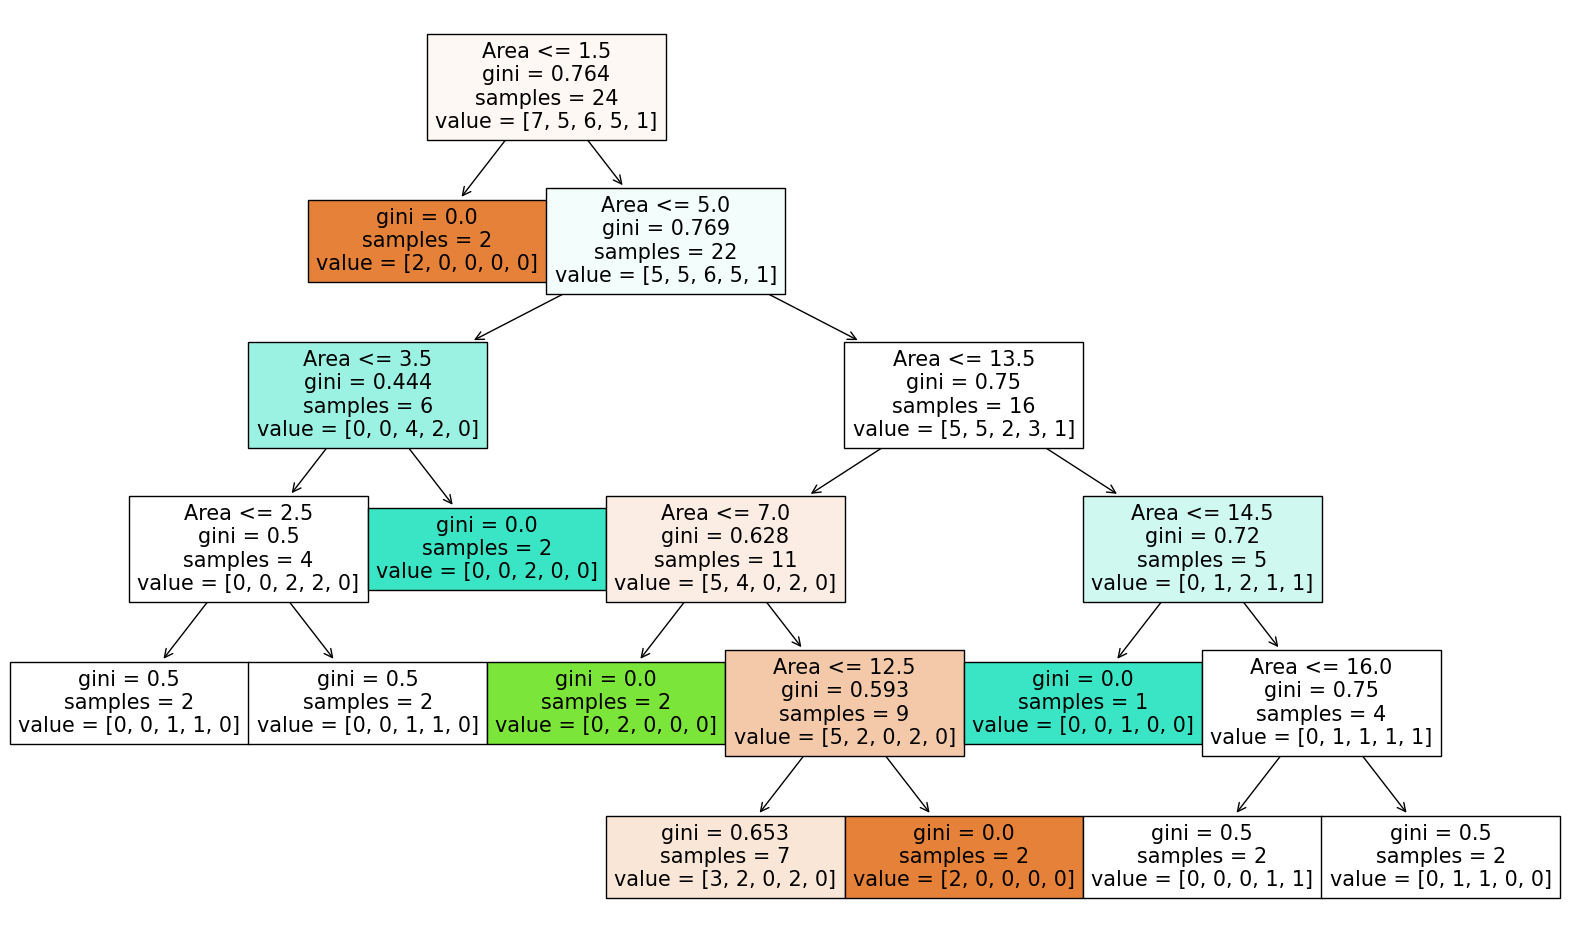

In [35]:
from sklearn import tree
plt.figure(figsize=(20,12))
tree.plot_tree(clf_multioutput.estimators_[0], feature_names=X_train.columns, filled=True)
plt.show()

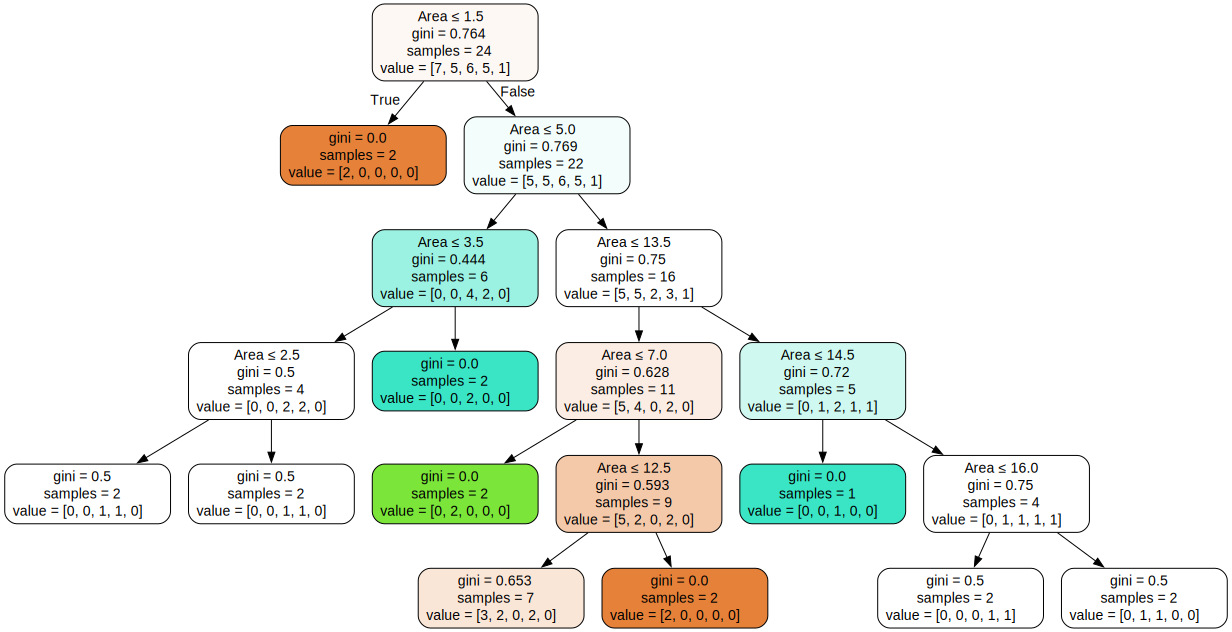

In [36]:
dot_data = export_graphviz(clf_multioutput.estimators_[0], out_file=None, feature_names=X_train.columns,
                           filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [37]:
from sklearn.metrics import confusion_matrix, classification_report
for i, target in enumerate(age_categories):
    print(f"Classification report for {target}:")
    print(classification_report(y_test[target], y_pred_multioutput[:, i]))
    print(f"Confusion matrix for {target}:")
    cm = confusion_matrix(y_test[target], y_pred_multioutput[:, i])
    print(cm)
    print("\n")

Classification report for 0-4:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.25      0.25      0.25         4
           2       0.00      0.00      0.00         2
          21       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1

    accuracy                           0.08        12
   macro avg       0.04      0.04      0.04        12
weighted avg       0.08      0.08      0.08        12

Confusion matrix for 0-4:
[[0 0 2 0 0 0 0]
 [1 1 1 0 1 0 0]
 [1 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0]]


Classification report for 5-9:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.29      1.00      0.44         2
          18       0.00      0

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classif